In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load Dataset
df = pd.read_csv("C://Users//EMEM PC//Downloads//test.csv")  



In [5]:
# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      2

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction           

In [7]:
# Data Cleaning
# Fill missing values with mode for categorical and median for numerical data
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
print(df.columns)


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [12]:
df.columns = df.columns.str.strip()
print([col.lower() for col in df.columns])  



['unnamed: 0', 'id', 'gender', 'customer type', 'age', 'type of travel', 'class', 'flight distance', 'inflight wifi service', 'departure/arrival time convenient', 'ease of online booking', 'gate location', 'food and drink', 'online boarding', 'seat comfort', 'inflight entertainment', 'on-board service', 'leg room service', 'baggage handling', 'checkin service', 'inflight service', 'cleanliness', 'departure delay in minutes', 'arrival delay in minutes', 'satisfaction']


In [13]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})


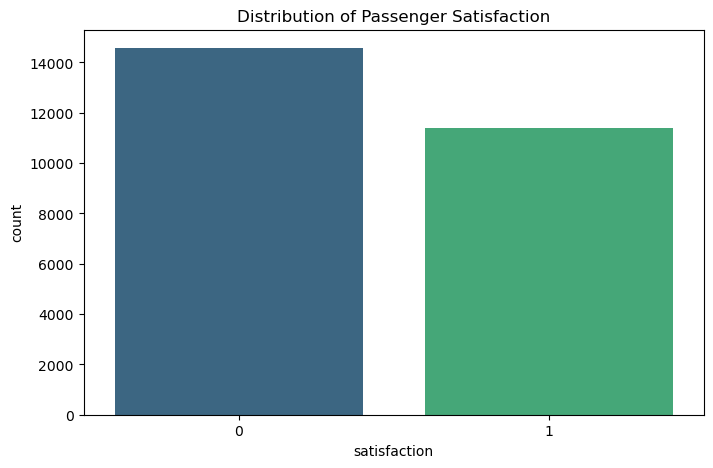

In [16]:
# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction', data=df, palette='viridis')
plt.title('Distribution of Passenger Satisfaction')
plt.show()


C:\Users\EMEM PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EMEM PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EMEM PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EMEM PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

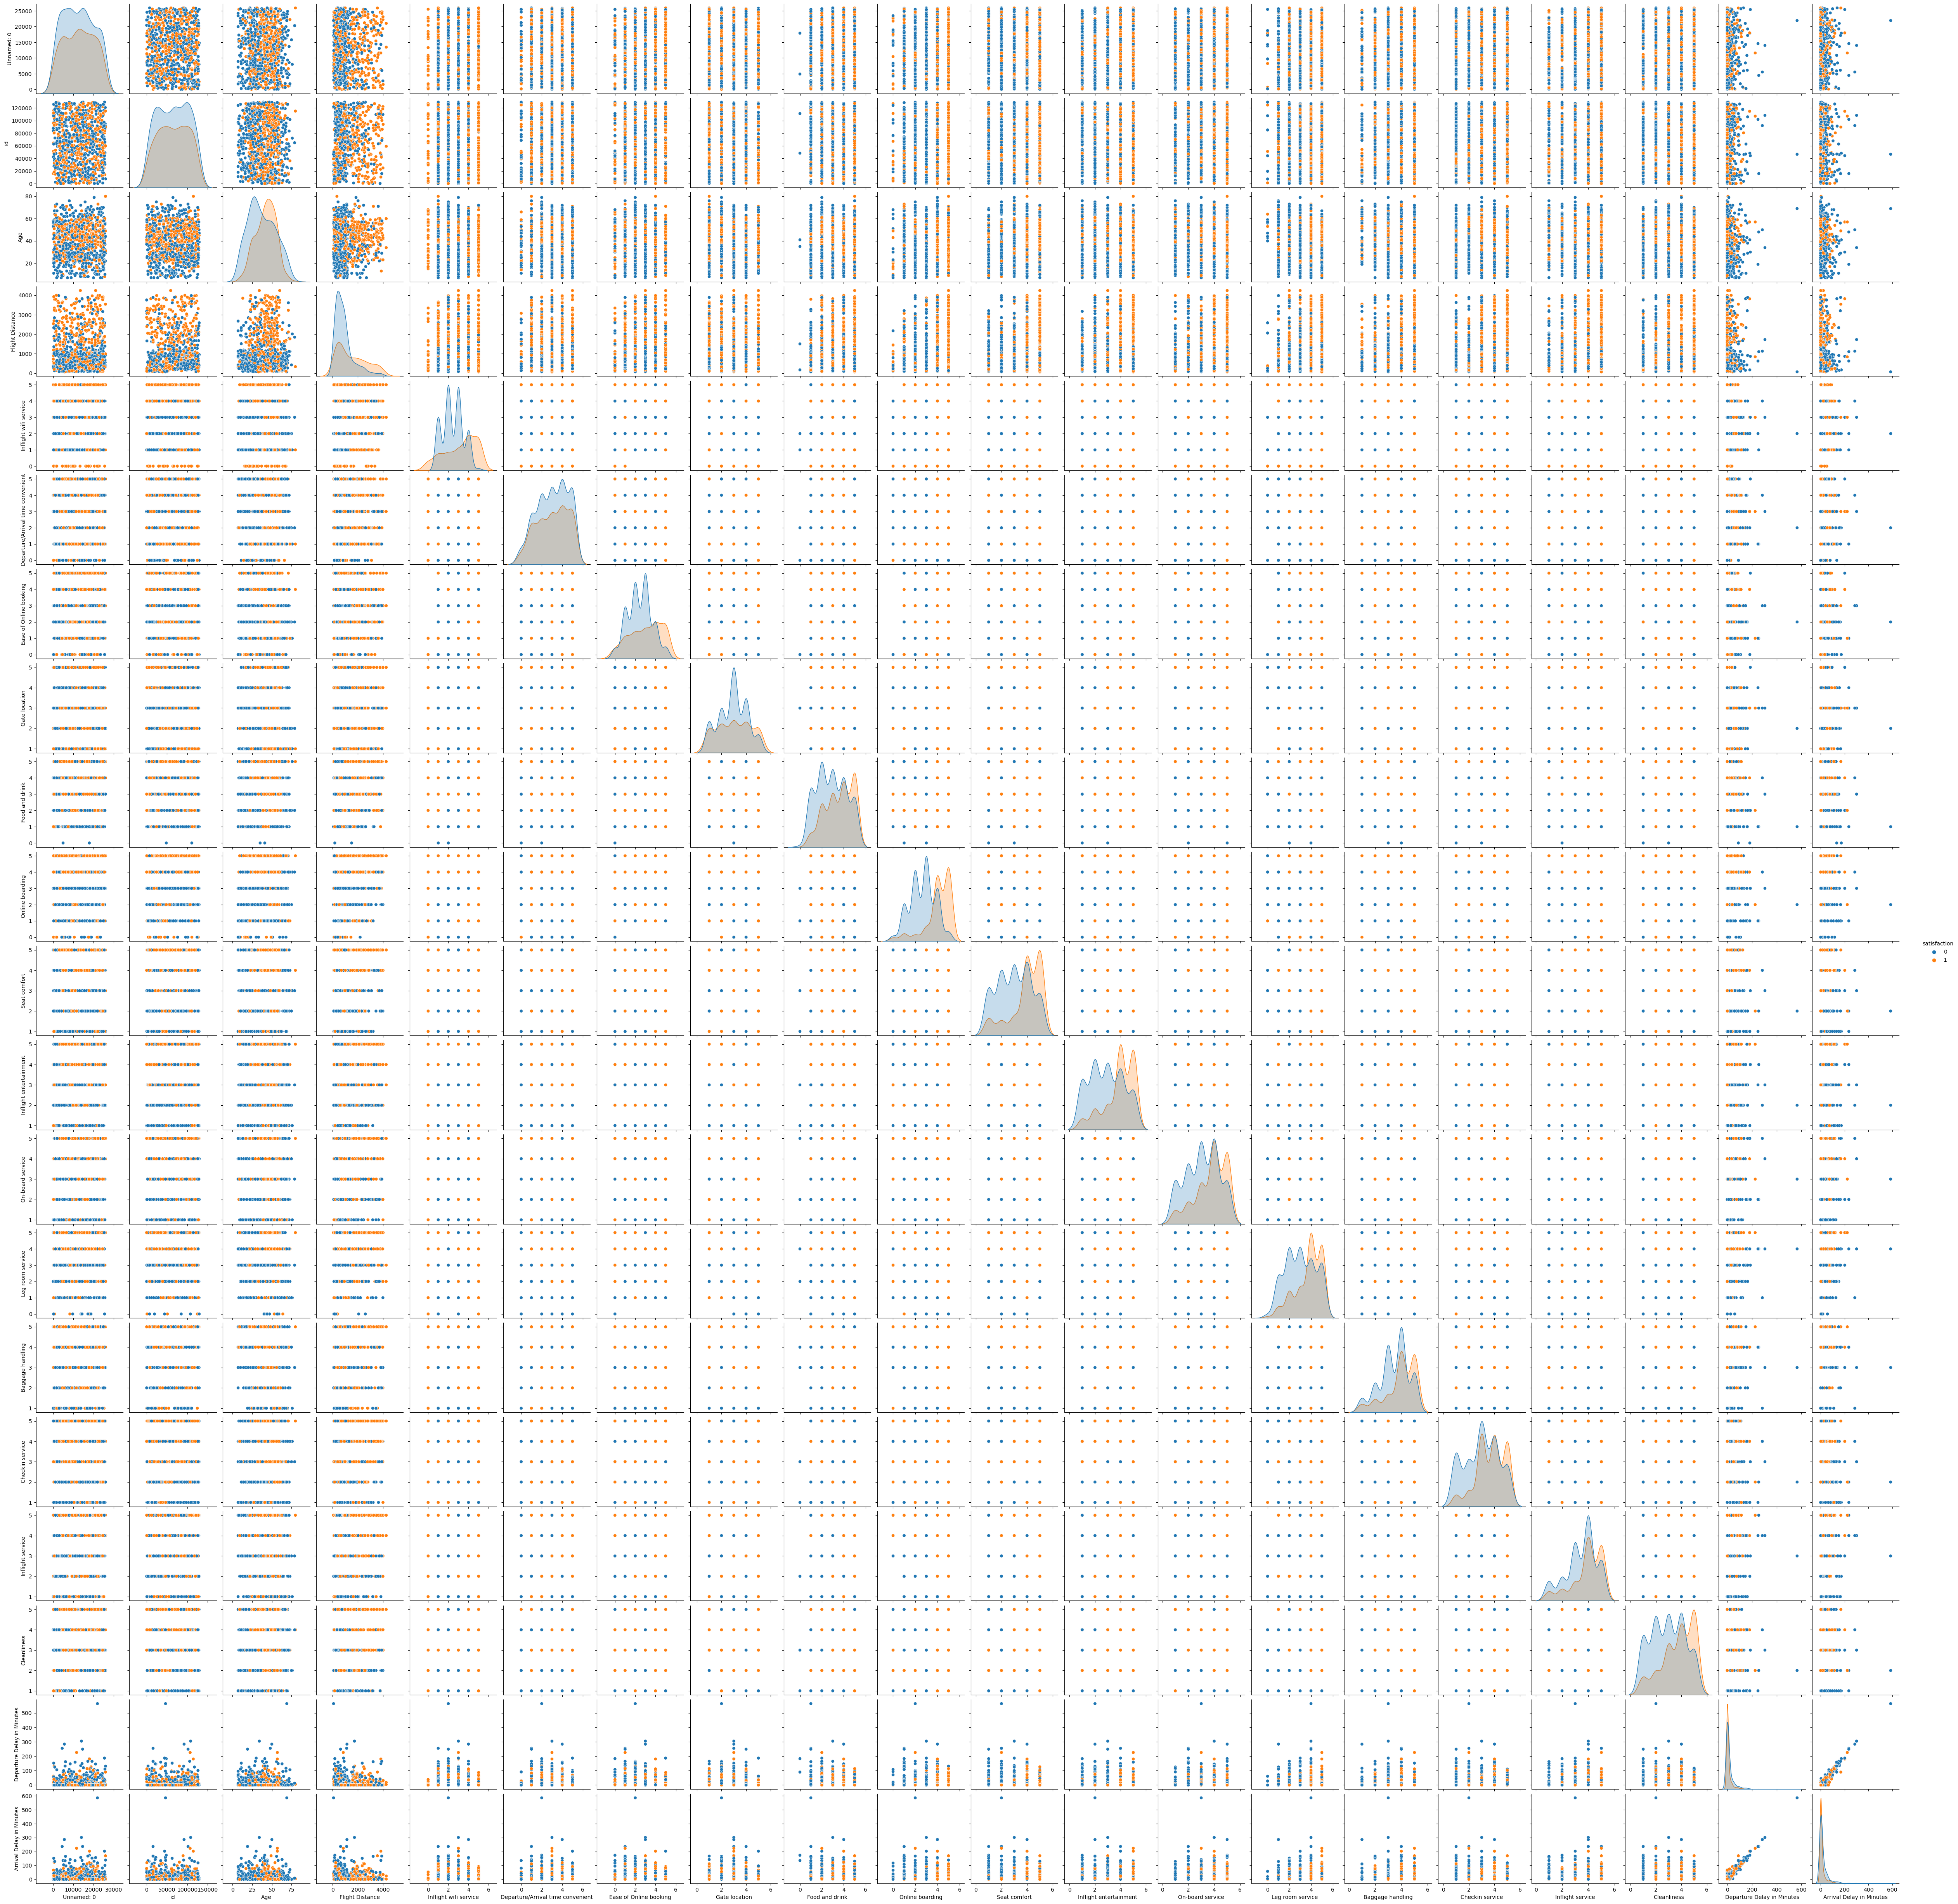

In [18]:
# Pairplot for numerical data
sns.pairplot(df.sample(1000), hue='satisfaction', diag_kind='kde')
plt.show()


C:\Users\EMEM PC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


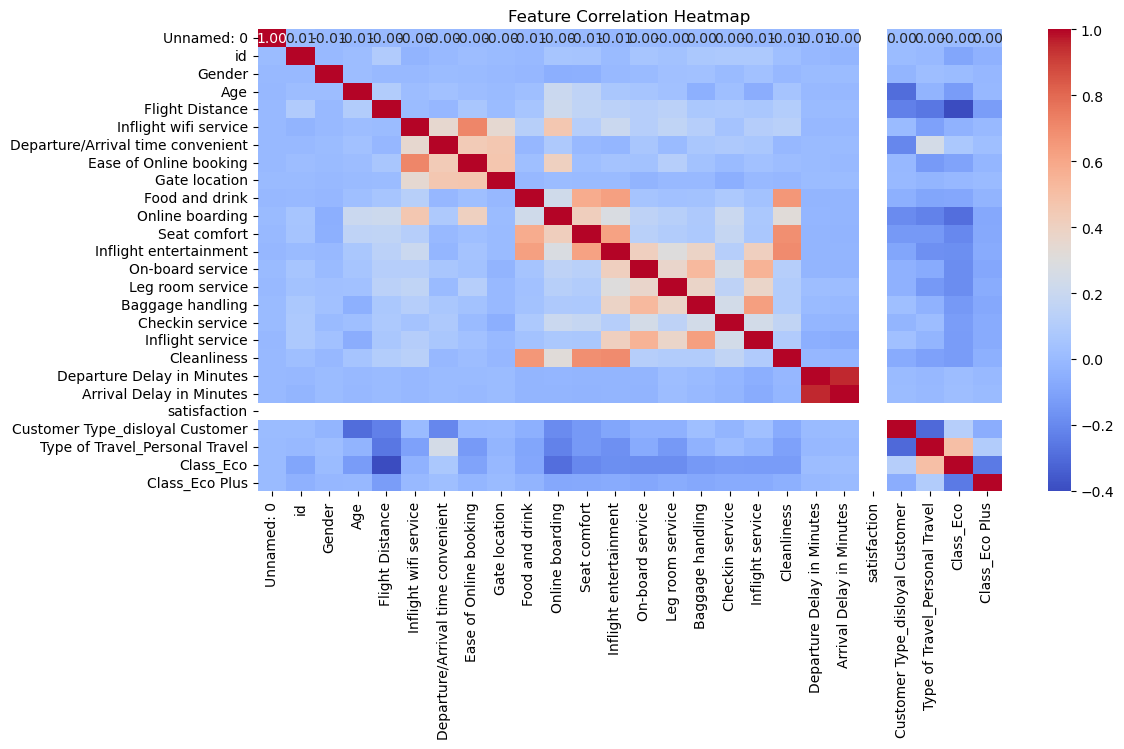

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Convert categorical variables into numeric using encoding
df_encoded = df.copy()

df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})
df_encoded['satisfaction'] = df_encoded['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# One-Hot Encoding for multi-class categorical variables
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

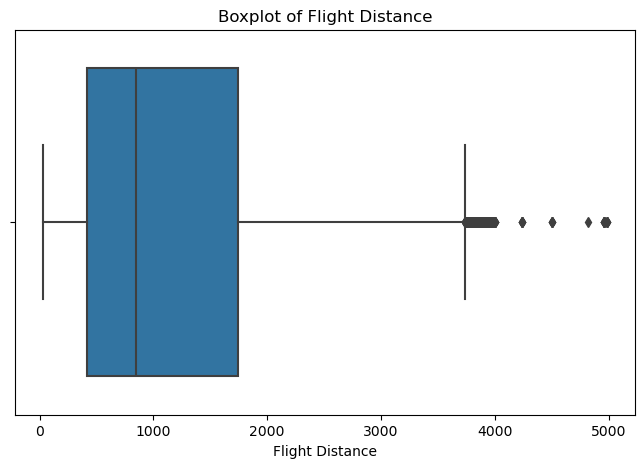

In [24]:
# Boxplot to check outliers in Flight Distance
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Flight Distance'])
plt.title('Boxplot of Flight Distance')
plt.show()
